# Sell Prediction for current products on basis of last six months History

## Libraries Used

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.ensemble import VotingClassifier
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

## 1) Problem Statement

In [2]:
# Predict product will sold or not in next 6 months
# by using independent variables
# File_Type , SKU_number, SoldFlag, SoldCount, MarketingType, ReleaseNumber, New_Release_Flag, StrengthFactor, 
# PriceReg, ReleaseYear, ItemCount,  LowUserPrice, LowNetPrice 

## 2) Data Gathering

In [46]:
hist_df = pd.read_csv("Simple_Imputation_mean.csv")
hist_df

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0,D,15,1,682743,98.793482,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0,D,7,1,1016014,24.810000,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0,D,0,0,340464,46.000000,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1,D,4,1,334011,100.000000,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1,D,2,1,1287938,121.950000,2010,28,4.00,23.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75991,85102,Historical,863599,0.0,0,S,2,1,119056,64.990000,2008,34,32.49,53.00
75992,85103,Historical,614304,0.0,0,S,6,1,1115312,21.500000,2004,53,47.99,21.97
75993,85104,Historical,109021,0.0,0,S,7,1,1315446,142.750000,2006,19,47.99,53.99
75994,85105,Historical,658242,0.0,0,S,2,1,877788,50.000000,2012,21,27.07,32.62


## Historical Data

In [47]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75996 entries, 0 to 75995
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order             75996 non-null  int64  
 1   File_Type         75996 non-null  object 
 2   SKU_number        75996 non-null  int64  
 3   SoldFlag          75996 non-null  float64
 4   SoldCount         75996 non-null  int64  
 5   MarketingType     75996 non-null  object 
 6   ReleaseNumber     75996 non-null  int64  
 7   New_Release_Flag  75996 non-null  int64  
 8   StrengthFactor    75996 non-null  int64  
 9   PriceReg          75996 non-null  float64
 10  ReleaseYear       75996 non-null  int64  
 11  ItemCount         75996 non-null  int64  
 12  LowUserPrice      75996 non-null  float64
 13  LowNetPrice       75996 non-null  float64
dtypes: float64(4), int64(8), object(2)
memory usage: 8.1+ MB


In [48]:
hist_df = df.groupby('File_Type').get_group('Historical')
hist_df

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014,24.81,2005,39,0,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464,46.0,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011,100.0,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938,121.95,2010,28,4,23.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75991,85102,Historical,863599,0.0,0.0,S,2,1,119056,64.99,2008,34,32.49,53
75992,85103,Historical,614304,0.0,0.0,S,6,1,1115312,21.5,2004,53,47.99,21.97
75993,85104,Historical,109021,0.0,0.0,S,7,1,1315446,142.75,2006,19,47.99,53.99
75994,85105,Historical,658242,0.0,0.0,S,2,1,877788,50,2012,21,27.07,32.62


## 3) EDA

#### 3.1 Order

In [49]:
# Order number of each item , can be ignore

#### 3.2 File Type

In [50]:
# Histirical data and Active data

In [51]:
hist_df['File_Type'].value_counts()

Historical    75996
Name: File_Type, dtype: int64

#### 3.3 SKU Number

In [52]:
# unique identifier for each item
# as it is identical for every row, can be ignore

In [53]:
hist_df['SKU_number'].value_counts()

1737127    1
195881     1
644193     1
50987      1
148776     1
          ..
118490     1
791735     1
2142996    1
147567     1
2538340    1
Name: SKU_number, Length: 75996, dtype: int64

#### 3.4 Sold FLag

In [54]:
# Target Variable
# 0 means product is not sold
# 1 means product is sold

In [55]:
hist_df['SoldFlag'].value_counts()

0.0    63000
1.0    12996
Name: SoldFlag, dtype: int64

#### 3.5 Sold count

In [56]:
# Count of sale at one time

In [57]:
hist_df['SoldCount'].value_counts()

0.0      62995
1.0       8179
2.0       2545
3.0       1018
4.0        483
5.0        253
6.0        149
7.0        121
8.0         62
9.0         32
10.0        30
12.0        28
11.0        21
14.0        11
13.0        10
16.0         9
15.0         6
18.0         5
19.0         4
22.0         4
17.0         3
27.0         3
26.0         3
36.0         2
21.0         2
24.0         2
30.0         1
40.0         1
25.0         1
33.0         1
28.0         1
65.0         1
20.0         1
35.0         1
34.0         1
69.0         1
150.0        1
73.0         1
51.0         1
159.0        1
Name: SoldCount, dtype: int64

<AxesSubplot:xlabel='SoldFlag', ylabel='SoldCount'>

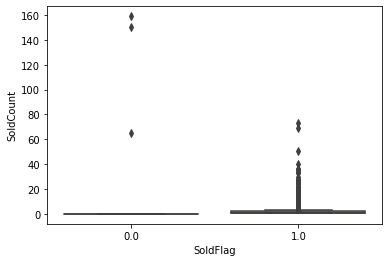

In [58]:
sns.boxplot(y= hist_df['SoldCount'], x=hist_df['SoldFlag'])

<AxesSubplot:xlabel='SoldFlag', ylabel='SoldCount'>

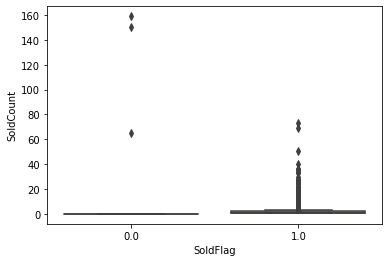

In [59]:
sns.boxplot(y= hist_df['SoldCount'], x=hist_df['SoldFlag'])

In [60]:
hist_df["SoldCount"].loc[(hist_df['SoldCount']>=1)&(hist_df["SoldFlag"]==0)] =0 

In [61]:
hist_df['SoldCount'] = np.where(hist_df['SoldCount'] > 13,hist_df['SoldCount'].std(),hist_df['SoldCount'])

#### 3.6 Marketing Type

In [62]:
# D type means Direct Marketing
# S type means Social media marketing

In [63]:
hist_df["MarketingType"].value_counts()

S    40877
D    35119
Name: MarketingType, dtype: int64

In [64]:
hist_df["MarketingType"].replace({"D":0,"S":1}, inplace=True)

#### 3.7 Release Number

In [65]:
# how many times changes done in original item

In [66]:
hist_df['ReleaseNumber'].value_counts()

2     16067
3     10427
1      9500
4      7473
0      6530
      ...  
46        1
99        1
51        1
54        1
60        1
Name: ReleaseNumber, Length: 66, dtype: int64

In [67]:
hist_df['ReleaseNumber'] = np.where(hist_df['ReleaseNumber'] > 9,hist_df['ReleaseNumber'].mean(),hist_df['ReleaseNumber'])

#### 3.8 New Release Flag

In [68]:
# 1 means New one latest verison of item is available
# 0 means Old one  verison of item is available

In [69]:
hist_df['New_Release_Flag'].value_counts()

1    59966
0    16030
Name: New_Release_Flag, dtype: int64

#### 3.9 strength Factor

In [70]:
# Populiarity index for perticular  item

In [71]:
hist_df['StrengthFactor'].value_counts()

197683     3
27028      3
117720     3
586672     3
734129     3
          ..
1517310    1
146673     1
894019     1
1147150    1
500956     1
Name: StrengthFactor, Length: 74598, dtype: int64

#### 3.10 Regular Prize

In [72]:
# Regular prize of item

In [73]:
hist_df["PriceReg"].isna().sum()

7

In [74]:
hist_df["PriceReg"].replace({'LA':np.nan,'?':np.nan,'#':np.nan,'FIFTY':np.nan},inplace = True)

In [75]:
hist_df["PriceReg"] = hist_df["PriceReg"].astype(float)

In [76]:
hist_df["PriceReg"] = np.where(hist_df['PriceReg']>169.575,hist_df["PriceReg"].mean(),hist_df['PriceReg'])

#### 3.11 Release Year

In [77]:
# New one release year of item

In [78]:
hist_df["ReleaseYear"].isna().sum()

0

In [79]:
bins = [1935,2003,2007,2010,2017]
labels = ['1935-2003','2003-2007','2007-2010','2010-2017']
hist_df["ReleaseYear"] = pd.cut(hist_df['ReleaseYear'], bins = bins, labels=labels)

In [80]:
hist_df['ReleaseYear'].replace({'2003-2007':1,'1935-2003':2,'2007-2010':4,'2010-2017':5},inplace=True)

In [81]:
hist_df['ReleaseYear'].isna().sum()

1

In [82]:
hist_df['ReleaseYear'].fillna(1,inplace = True)

#### 3.11 Item Count

In [83]:
# actual quantity of items available

In [85]:
hist_df["ItemCount"].replace({'$':np.nan,'?':np.nan,'#':np.nan,'FIFTY':np.nan},inplace = True)

In [87]:
hist_df["ItemCount"] = hist_df["ItemCount"].astype(float)

In [88]:
hist_df['ItemCount'] = np.where(hist_df['ItemCount'] > 81,hist_df['ItemCount'].mean(),hist_df['ItemCount'])

#### 3.12 Low user price

In [ ]:
# Price of item somewhat profitable than its detoration price

In [91]:
hist_df["LowUserPrice"] = hist_df["LowUserPrice"].astype(float)

In [90]:
hist_df["LowUserPrice"].replace({'$':np.nan,'?':np.nan,'#':np.nan,'%':np.nan,'@':np.nan},inplace = True)

In [92]:
hist_df['LowUserPrice'] = np.where(hist_df['LowUserPrice']> 139.5,hist_df['LowUserPrice'].mean(),hist_df['LowUserPrice'])

#### 3.12 Low Net price

In [ ]:
# Price without any profit

In [94]:
hist_df["LowNetPrice"] = hist_df["LowNetPrice"].astype(float)

In [93]:
hist_df["LowNetPrice"].replace({'$':np.nan,'?':np.nan,'#':np.nan,'%':np.nan,'@':np.nan,'A':np.nan,'&':np.nan,'(':np.nan},inplace = True)

In [95]:
hist_df['LowNetPrice'] = np.where(hist_df['LowNetPrice']> 95,hist_df['LowNetPrice'].mean(),hist_df['LowNetPrice'])

### Checking THE Null Value in Dataframe

In [96]:
hist_df.isna().sum()

Order                 0
File_Type             0
SKU_number            0
SoldFlag              0
SoldCount             2
MarketingType         0
ReleaseNumber         0
New_Release_Flag      0
StrengthFactor        3
PriceReg             12
ReleaseYear           0
ItemCount            35
LowUserPrice        100
LowNetPrice          89
dtype: int64

In [97]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75996 entries, 0 to 75995
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Order             75996 non-null  int64   
 1   File_Type         75996 non-null  object  
 2   SKU_number        75996 non-null  int64   
 3   SoldFlag          75996 non-null  float64 
 4   SoldCount         75994 non-null  float64 
 5   MarketingType     75996 non-null  int64   
 6   ReleaseNumber     75996 non-null  float64 
 7   New_Release_Flag  75996 non-null  int64   
 8   StrengthFactor    75993 non-null  object  
 9   PriceReg          75984 non-null  float64 
 10  ReleaseYear       75996 non-null  category
 11  ItemCount         75961 non-null  float64 
 12  LowUserPrice      75896 non-null  float64 
 13  LowNetPrice       75907 non-null  float64 
dtypes: category(1), float64(7), int64(4), object(2)
memory usage: 8.2+ MB


In [98]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75996 entries, 0 to 75995
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Order             75996 non-null  int64   
 1   File_Type         75996 non-null  object  
 2   SKU_number        75996 non-null  int64   
 3   SoldFlag          75996 non-null  float64 
 4   SoldCount         75994 non-null  float64 
 5   MarketingType     75996 non-null  int64   
 6   ReleaseNumber     75996 non-null  float64 
 7   New_Release_Flag  75996 non-null  int64   
 8   StrengthFactor    75993 non-null  object  
 9   PriceReg          75984 non-null  float64 
 10  ReleaseYear       75996 non-null  category
 11  ItemCount         75961 non-null  float64 
 12  LowUserPrice      75896 non-null  float64 
 13  LowNetPrice       75907 non-null  float64 
dtypes: category(1), float64(7), int64(4), object(2)
memory usage: 8.2+ MB


In [99]:
df2 = hist_df.copy()

In [100]:
df2.drop(['Order','File_Type','StrengthFactor'],axis=1,inplace=True)

In [101]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75996 entries, 0 to 75995
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SKU_number        75996 non-null  int64   
 1   SoldFlag          75996 non-null  float64 
 2   SoldCount         75994 non-null  float64 
 3   MarketingType     75996 non-null  int64   
 4   ReleaseNumber     75996 non-null  float64 
 5   New_Release_Flag  75996 non-null  int64   
 6   PriceReg          75984 non-null  float64 
 7   ReleaseYear       75996 non-null  category
 8   ItemCount         75961 non-null  float64 
 9   LowUserPrice      75896 non-null  float64 
 10  LowNetPrice       75907 non-null  float64 
dtypes: category(1), float64(7), int64(3)
memory usage: 6.5 MB


In [102]:
df2['ReleaseYear'] = df2['ReleaseYear'].astype(float)

## Missing value Imptation

In [103]:
knn_imputer = KNNImputer(n_neighbors=5)
arr1 = knn_imputer.fit_transform(df2)
new_df = pd.DataFrame(arr1, columns=df2.columns)
new_df

,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,1737127.0,0.0,0.0,0.0,4.152534,1.0,44.99,5.0,8.0,28.97,31.84
1,3255963.0,0.0,0.0,0.0,7.000000,1.0,24.81,1.0,39.0,0.00,15.54
2,612701.0,0.0,0.0,0.0,0.000000,0.0,46.00,5.0,34.0,30.19,27.97
3,115883.0,1.0,1.0,0.0,4.000000,1.0,100.00,1.0,20.0,133.93,83.15
4,863939.0,1.0,1.0,0.0,2.000000,1.0,121.95,4.0,28.0,4.00,23.99
...,...,...,...,...,...,...,...,...,...,...,...
75991,863599.0,0.0,0.0,1.0,2.000000,1.0,64.99,4.0,34.0,32.49,53.00
75992,614304.0,0.0,0.0,1.0,6.000000,1.0,21.50,1.0,53.0,47.99,21.97
75993,109021.0,0.0,0.0,1.0,7.000000,1.0,142.75,1.0,19.0,47.99,53.99
75994,658242.0,0.0,0.0,1.0,2.000000,1.0,50.00,5.0,21.0,27.07,32.62


In [104]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75996 entries, 0 to 75995
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SKU_number        75996 non-null  float64
 1   SoldFlag          75996 non-null  float64
 2   SoldCount         75996 non-null  float64
 3   MarketingType     75996 non-null  float64
 4   ReleaseNumber     75996 non-null  float64
 5   New_Release_Flag  75996 non-null  float64
 6   PriceReg          75996 non-null  float64
 7   ReleaseYear       75996 non-null  float64
 8   ItemCount         75996 non-null  float64
 9   LowUserPrice      75996 non-null  float64
 10  LowNetPrice       75996 non-null  float64
dtypes: float64(11)
memory usage: 6.4 MB


## 4) Feature Selection

### For Increasing the accuracy we are adding some extra columns

In [105]:
new_df["Holding_cost"] = new_df["PriceReg"]*new_df["ItemCount"]
new_df["profit"] = new_df["PriceReg"]-new_df["LowNetPrice"]

In [106]:
new_df.corr()

,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,Holding_cost,profit
SKU_number,1.000000,-0.108202,-0.086079,0.070716,-0.193572,-0.161232,-0.126564,0.048758,-0.337607,-0.180865,0.124600,-0.296441,-0.197427
SoldFlag,-0.108202,1.000000,0.731293,-0.220692,0.078066,0.006877,0.070088,0.060431,0.205877,0.149260,-0.010166,0.191576,0.075338
SoldCount,-0.086079,0.731293,1.000000,-0.186354,0.063051,0.001596,0.054271,0.075316,0.178802,0.129237,-0.010221,0.162922,0.059694
MarketingType,0.070716,-0.220692,-0.186354,1.000000,-0.007168,0.131475,-0.078419,0.118534,-0.102637,-0.315526,0.040985,-0.133031,-0.101401
ReleaseNumber,-0.193572,0.078066,0.063051,-0.007168,1.000000,0.630688,0.123756,0.113484,0.171242,0.205882,0.019027,0.198878,0.111664
New_Release_Flag,-0.161232,0.006877,0.001596,0.131475,0.630688,1.000000,0.076711,0.097365,0.111045,0.120916,0.026530,0.121702,0.060702
PriceReg,-0.126564,0.070088,0.054271,-0.078419,0.123756,0.076711,1.000000,-0.002700,0.045279,0.268971,0.276016,0.698230,0.831651
ReleaseYear,0.048758,0.060431,0.075316,0.118534,0.113484,0.097365,-0.002700,1.000000,0.026160,-0.031821,0.124879,0.030826,-0.074824
ItemCount,-0.337607,0.205877,0.178802,-0.102637,0.171242,0.111045,0.045279,0.026160,1.000000,0.088001,-0.203708,0.675688,0.162568
LowUserPrice,-0.180865,0.149260,0.129237,-0.315526,0.205882,0.120916,0.268971,-0.031821,0.088001,1.000000,0.154601,0.234402,0.177262


In [107]:
df3= new_df.drop(["SoldCount","LowNetPrice",'LowUserPrice','Holding_cost','ReleaseNumber','SKU_number'] ,axis =1)
df3

,SoldFlag,MarketingType,New_Release_Flag,PriceReg,ReleaseYear,ItemCount,profit
0,0.0,0.0,1.0,44.99,5.0,8.0,13.15
1,0.0,0.0,1.0,24.81,1.0,39.0,9.27
2,0.0,0.0,0.0,46.00,5.0,34.0,18.03
3,1.0,0.0,1.0,100.00,1.0,20.0,16.85
4,1.0,0.0,1.0,121.95,4.0,28.0,97.96
...,...,...,...,...,...,...,...
75991,0.0,1.0,1.0,64.99,4.0,34.0,11.99
75992,0.0,1.0,1.0,21.50,1.0,53.0,-0.47
75993,0.0,1.0,1.0,142.75,1.0,19.0,88.76
75994,0.0,1.0,1.0,50.00,5.0,21.0,17.38


In [108]:
x = df3.drop('SoldFlag',axis=1)

In [109]:
y = df3['SoldFlag']


In [110]:
x

,MarketingType,New_Release_Flag,PriceReg,ReleaseYear,ItemCount,profit
0,0.0,1.0,44.99,5.0,8.0,13.15
1,0.0,1.0,24.81,1.0,39.0,9.27
2,0.0,0.0,46.00,5.0,34.0,18.03
3,0.0,1.0,100.00,1.0,20.0,16.85
4,0.0,1.0,121.95,4.0,28.0,97.96
...,...,...,...,...,...,...
75991,1.0,1.0,64.99,4.0,34.0,11.99
75992,1.0,1.0,21.50,1.0,53.0,-0.47
75993,1.0,1.0,142.75,1.0,19.0,88.76
75994,1.0,1.0,50.00,5.0,21.0,17.38


## 5) Modeling

### Train and Test Split

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=2, stratify=y)

### Model Building

In [112]:
clf1 = DecisionTreeClassifier(random_state=11)
clf2 = LogisticRegression(random_state=11)
clf3 = KNeighborsClassifier()

models = [('DT', clf1), ('Log_reg', clf2), ('KNN', clf3)]
voting_clf = VotingClassifier(models, n_jobs=-1)
voting_clf.fit(x_train,y_train)

VotingClassifier(estimators=[('DT', DecisionTreeClassifier(random_state=11)),
                             ('Log_reg', LogisticRegression(random_state=11)),
                             ('KNN', KNeighborsClassifier())],
                 n_jobs=-1)

## 6) Evaluation

In [113]:
def evaluation(string, model, ind_var, act):
    print(string.center(50, '*'))
    
    pred = model.predict(ind_var)
    cnf_matrix = confusion_matrix(act,pred)
    print('Confusion Matrix :\n', cnf_matrix)
    
    accuracy = accuracy_score(act, pred)
    print('Accuracy :', accuracy)
    
    clf_report = classification_report(act,pred)
    print('Classification Report :\n',clf_report)
    
evaluation('Train Data Accuracy', voting_clf, x_train, y_train)
print('*#'*30)
evaluation('Test Data Accuracy', voting_clf, x_test, y_test)

***************Train Data Accuracy****************
Confusion Matrix :
 [[50256   143]
 [ 7351  3046]]
Accuracy : 0.8767353115336536
Classification Report :
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     50399
         1.0       0.96      0.29      0.45     10397

    accuracy                           0.88     60796
   macro avg       0.91      0.65      0.69     60796
weighted avg       0.89      0.88      0.85     60796

*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#
****************Test Data Accuracy****************
Confusion Matrix :
 [[12250   351]
 [ 2329   270]]
Accuracy : 0.8236842105263158
Classification Report :
               precision    recall  f1-score   support

         0.0       0.84      0.97      0.90     12601
         1.0       0.43      0.10      0.17      2599

    accuracy                           0.82     15200
   macro avg       0.64      0.54      0.53     15200
weighted avg       0.77   

# Prediction

In [114]:
MarketingType = 1
New_Release_Flag = 1
PriceReg = 50
ReleaseYear = 4
ItemCount = 20
profit = 10

test_array = np.array( [MarketingType, New_Release_Flag, PriceReg, ReleaseYear, ItemCount, profit],ndmin = 2)
test_array
predicted_value = voting_clf.predict(test_array)[0]
if predicted_value == 0:
    print('Your Product will not sell in next 6 months')
    
else:
    print('Your Product will sell in next 6 months')

Your Product will not sell in next 6 months


# Model Saving

In [115]:
import pickle

In [116]:
pickle.dump(voting_clf, open('voting_clf.pkl','wb'))

In [ ]:
{
"data": {
   "MarketingType" : 1,
"New_Release_Flag" : 1,
"PriceReg" : 50,
"ReleaseYear" : 4,
"ItemCount" : 20,
"profit" : 10}
}